Accuracy with k=100: 53.2058492688414
Accuracy with Logistic Regression: 68.95388076490438


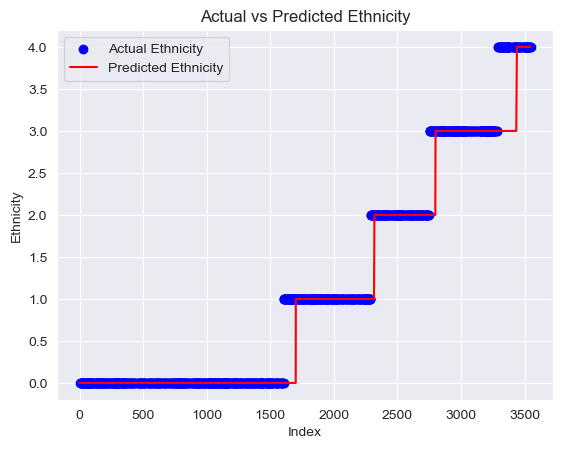

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model, model_selection
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Importing data
df = pd.read_csv('age_gender.csv')

X_pixels = df["pixels"]
y = df[["age","ethnicity","gender"]]
y1 = df["age"]
y2 = df["ethnicity"]
y3 = df["gender"]

X = np.array(list(map(lambda x: list(map(int, x.split())), X_pixels)), dtype=np.uint8).reshape((-1, 48, 48, 1))

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y2, test_size=0.15, random_state=7)

# Flatten the images
X1_train_flat = X1_train.reshape((X1_train.shape[0], -1))
X1_test_flat = X1_test.reshape((X1_test.shape[0], -1))

# Standardize the pixel values
sc = StandardScaler()
X1_train_scaled = sc.fit_transform(X1_train_flat)
X1_test_scaled = sc.transform(X1_test_flat)

# Using KNN with k = 100 to estimate the round results
KNN = KNeighborsClassifier(n_neighbors=101)
KNN.fit(X1_train_scaled, y1_train)
y1_pred = KNN.predict(X1_test_scaled)

print("Accuracy with k=100:", accuracy_score(y1_test, y1_pred) * 100)

# Using LogisticRegression to estimate the round results
clf = LogisticRegression(multi_class='ovr', max_iter=10000).fit(X1_train_scaled, y1_train)
y1_pred_lr = clf.predict(X1_test_scaled)
accuracy_lr = clf.score(X1_test_scaled, y1_test)
print("Accuracy with Logistic Regression:", accuracy_lr * 100)

indices = np.random.choice(len(y1_test), size=1000, replace=False)

# Sort indices for smoother line plotting
indices = np.sort(indices)

# Plot actual ages
plt.scatter(indices, np.sort(y1_test.iloc[indices]), label='Actual Ethnicity', marker='o', color='blue')

# Plot predicted ages
plt.plot(indices, np.sort(y1_pred_lr[indices]), label='Predicted Ethnicity', linestyle='-', color='red')

plt.title('Actual vs Predicted Ethnicity')
plt.xlabel('Index')
plt.ylabel('Ethnicity')
plt.legend()
plt.show()

Accuracy with SVM: 87.26096737907761
Accuracy with Logistic Regression: 84.3644544431946


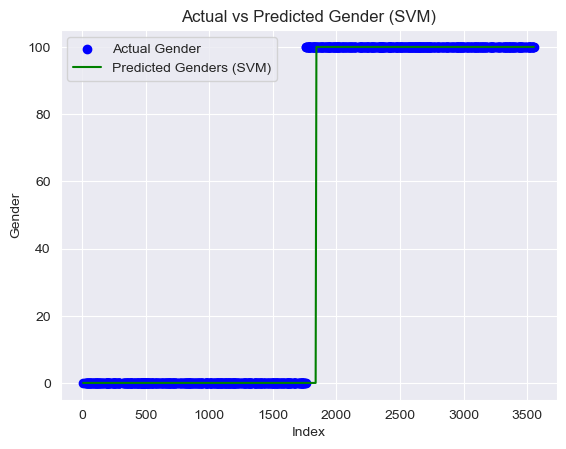

In [5]:
from sklearn.svm import SVC

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y3, test_size=0.15, random_state=7)

# Flatten the images
X1_train_flat = X1_train.reshape((X1_train.shape[0], -1))
X1_test_flat = X1_test.reshape((X1_test.shape[0], -1))

# Standardize the pixel values
sc = StandardScaler()
X1_train_scaled = sc.fit_transform(X1_train_flat)
X1_test_scaled = sc.transform(X1_test_flat)

svm_classifier = SVC(kernel='rbf', gamma='scale')
svm_classifier.fit(X1_train_scaled, y1_train)
y1_pred_svm = svm_classifier.predict(X1_test_scaled)

# Calculate accuracy for SVM
accuracy_svm = accuracy_score(y1_test, y1_pred_svm)
print("Accuracy with SVM:", accuracy_svm * 100)

clf = LogisticRegression(multi_class='ovr', max_iter=10000).fit(X1_train_scaled, y1_train)
y1_pred_lr = clf.predict(X1_test_scaled)
accuracy_lr = clf.score(X1_test_scaled, y1_test)
print("Accuracy with Logistic Regression:", accuracy_lr * 100)

# Randomly select 1000 indices for plotting
indices_svm = np.random.choice(len(y1_test), size=1000, replace=False)

# Sort indices for smoother line plotting
indices_svm = np.sort(indices_svm)

# Plot actual ages
plt.scatter(indices_svm, np.sort(100 * y1_test.iloc[indices_svm]), label='Actual Gender', marker='o', color='blue')

# Plot predicted ages for SVM
plt.plot(indices_svm, np.sort(100 * y1_pred_svm[indices_svm]), label='Predicted Genders (SVM)', linestyle='-', color='green')

plt.title('Actual vs Predicted Gender (SVM)')
plt.xlabel('Index')
plt.ylabel('Gender')
plt.legend()
plt.show()

Mean Squared Error: 245.7140262651132


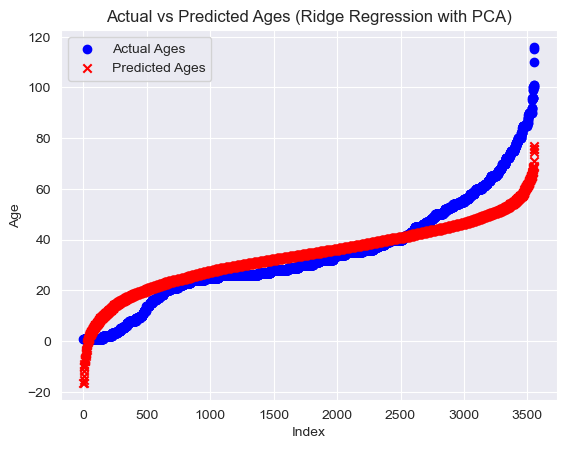

In [8]:
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X = np.array(list(map(lambda x: list(map(int, x.split())), X_pixels)), dtype=np.uint8).reshape((-1, 48, 48, 1))

# Flatten the images
X_flat = X.reshape((X.shape[0], -1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, y1, test_size=0.15, random_state=7)

# Standardize the pixel values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensionality
n_components = 100  # You can adjust this based on your requirements
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Apply Ridge Regression
alpha = 1.0  # Regularization strength, you can adjust this
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_pca, y_train)

# Predict using the trained model
y_pred = ridge.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.scatter(range(len(y_test)), np.sort(y_test), label='Actual Ages', marker='o', color='blue')

# Plot predicted ages
plt.scatter(range(len(y_test)), np.sort(y_pred), label='Predicted Ages', marker='x', color='red')

plt.title('Actual vs Predicted Ages (Ridge Regression with PCA)')
plt.xlabel('Index')
plt.ylabel('Age')
plt.legend()
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a simple CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3))  # 3 output neurons for 'age', 'ethnicity', and 'gender'

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Mean Absolute Error: {mae}')

Epoch 1/10
593/593 [==============================] - 10s 16ms/step - loss: 120.9990 - mae: 5.3026 - val_loss: 65.5107 - val_mae: 4.4778
Epoch 2/10
593/593 [==============================] - 9s 15ms/step - loss: 58.4012 - mae: 3.9487 - val_loss: 49.1225 - val_mae: 3.5852
Epoch 3/10
593/593 [==============================] - 9s 15ms/step - loss: 48.4358 - mae: 3.5741 - val_loss: 45.1626 - val_mae: 3.5326
Epoch 4/10
593/593 [==============================] - 9s 16ms/step - loss: 44.3744 - mae: 3.4166 - val_loss: 44.8135 - val_mae: 3.4120
Epoch 5/10
593/593 [==============================] - 9s 16ms/step - loss: 37.9166 - mae: 3.1453 - val_loss: 43.4575 - val_mae: 3.2573
Epoch 6/10
593/593 [==============================] - 9s 15ms/step - loss: 34.7484 - mae: 3.0160 - val_loss: 39.7497 - val_mae: 3.2464
Epoch 7/10
593/593 [==============================] - 9s 16ms/step - loss: 32.0680 - mae: 2.9185 - val_loss: 37.4221 - val_mae: 3.0882
Epoch 8/10
593/593 [==============================] -